<!--start-block-->
<hr style="height: 1px;">
<i>This code was authored by the 8.S50x Course Team, Copyright 2021 MIT All Rights Reserved.</i>
<hr style="height: 1px;">
<br>

# RECITATION 7: Introduction to W and Z Bosons, the LHC, and Jets

<br>
<!--end-block--> 

<!--start-block-->
<hr style="height: 1px;">

## 7.0 Overview of Learning Objectives


In this recitation we will explore the following objectives:

- What are W and Z Bosons?
- How to make pretty histograms
- How to remove background jets

This recitation should give a lot of background information which will make the first parts of project 2 (making a mass plot for W and Z bosons) pretty easy!

<br>
<!--end-block-->

<!--start-block-->
<hr style="height: 1px;">

## 7.1 W and Z Bosons

W and Z bosons are elementary subatomic particles that are the mediators of the weak nuclear force.  The weak nuclear force allows for beta decay, as shown below, by converting a proton to a neutron or a neutron to a proton.

<br>
<!--end-block-->

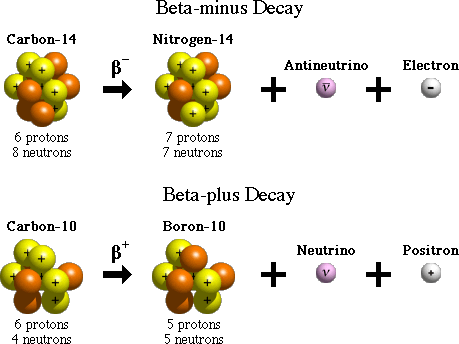

W Bosons:
- Mass = 80.4 MeV/c^2
- Charge = -1
- Mediator of Nuclear Transmutation

Z Bosons:
- Mass = 91.2 MeV/c^2
- Charge = 0
- Mediator of Elastic Neutrino Scattering

<!--start-block-->
<hr style="height: 1px;">

## 7.2 Python Histograms

Here we will briefly go over how to make the histograms you see at the start of project 2.  The example ones in the project are made using matplotlib's plt.hist.  The function works like this: 

plt.hist(x, bins, range, density, weights, cumulative, bottom, histtype, align, orietation, rwidth, log, color, label, stacked)

More information can be found in matplotlib's documentation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.hist.html#

<br>

In [5]:
# Imports
import numpy as np
import matplotlib.pyplot as plt
import os,sys

# Plotting Style for High Energy physics 
import mplhep as hep
plt.style.use(hep.style.CMS)

In [58]:
# Generating a Three Random Data Sets to Work With
x = np.random.randint(1, 101, 80)
y = np.random.randint(1, 101, 80)
z = np.random.randint(1, 101, 80)

print(x)
print(y)
print(z)

[  5  53   2  73  59  91  32  33  54  82  75  32  50  90   5  39  83  89
  95  67  14  18  87  86  57  86   8  34  41  69  24  96   9  77   1  21
  40  84  21  15  50  94  48  63  58 100  62  93   6  43  94  40 100  20
  68  27  40  61  91  84  13   3  64   5  49  35  67  48  61  64  50  12
  41  37  12  68  53  21  17  13]
[ 85  98  79  31  49  59  32   5  28  64  58  35  45  78  17  69  24  37
  19  93  78  57  97  82  48  65  93  97   6   5  65  44  25  78  63  57
  12  28  94  18  14   2  41  67  48  10  36  49  34  79  45  89   6  14
  65   9  88  69   7  19  35 100  76  80  85  78   8  56  87   5  10   5
  21   4  84  76  78  27  71  75]
[ 23  24  36  85  25  80  95  42  57  58  20  14   6  58  18   9  10   5
 100  93   8  25  96  51  96  13  48  94  60  29  83  91  50  97  76  35
  75  10  52  90  59  30  20  36  60  42  85   4  94  63   5  16  96  99
  19  58  96  57  40  23  32  49  47   1  57  40  50  22  14  38  30  88
  64  46   6  38  92  11   3  43]


<!--start-block-->
#### <span style="color:purple">>>>QUESTION</span>

Using the randomly generated data above and the matplotlib documentation, try to recreate the histogram shown below.

Hint: To get a legend, it is best to graph each dataset seperatly.

<br>
<!--end-block-->

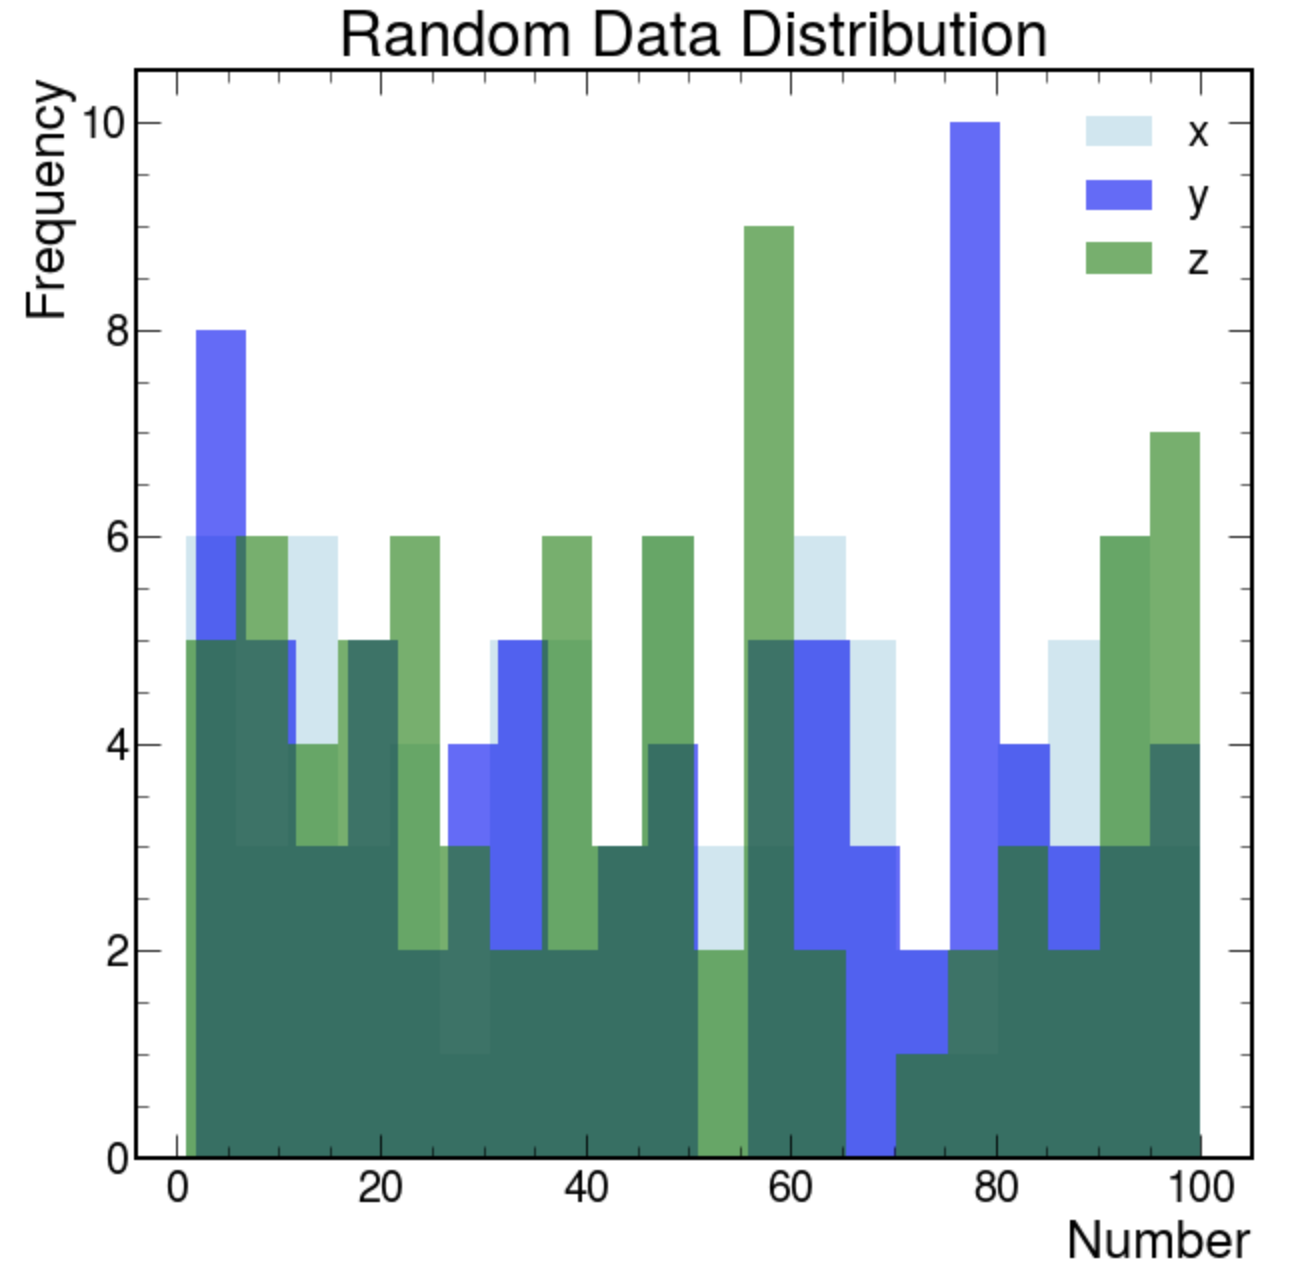

<!--start-block-->
<hr style="height: 1px;">

## 7.3 Removing Background

In this section we will go over the steps to reducing jet data.  Before we start, lets run the code given to you at the begining of project 2.
<br>

In [67]:
import uproot

#Insert The Directory of your Data Folder Here
os.chdir("/Users/briannaryan/Desktop/8.s50/Project2") 

In [68]:
wqq    = uproot.open("data/WQQ_s.root")["Tree"]
zqq    = uproot.open("data/ZQQ_s.root")["Tree"]
wqq13  = uproot.open("data/skimh/WQQ_sh.root")["Tree"]
zqq13  = uproot.open("data/skimh/ZQQ_sh.root")["Tree"]
wqq_n  = uproot.open("data/WQQ_8TeV_Jan11_r.root")["Tree"]
zqq_n  = uproot.open("data/ZQQ_8TeV_Jan11_r.root")["Tree"]
qcd    = uproot.open("data/QCD_s.root")["Tree"]
tt     = uproot.open("data/TT.root")["Tree"]
ww     = uproot.open("data/WW.root")["Tree"]
wz     = uproot.open("data/WZ.root")["Tree"]
zz     = uproot.open("data/ZZ.root")["Tree"]
ggh    = uproot.open("data/ggH.root")["Tree"]
data   = uproot.open("data/JetHT_s.root")["Tree"]

dataDict = {'qcd': qcd,
            'tt': tt,
            'data': data,
            'wqq': wqq,
            'zqq': zqq,
            'wqq13': wqq13,
            'zqq13': zqq13,
            'wqq_n': wqq_n,
            'zqq_n': zqq_n,
            'ww': ww,
            'zz': zz,
            'wz': wz,
            'ggh': ggh
            }
from collections import OrderedDict 

order_of_keys = ['data','qcd','tt','ww','zz','wz','wqq','wqq13','wqq_n','zqq','zqq13','zqq_n','ggh']
list_of_tuples = [(key, dataDict[key]) for key in order_of_keys]
OrdDataDict = OrderedDict(list_of_tuples)

In [74]:
# these are the standard weights
weights=[1000*18300,"puweight","scale1fb"]

def get_weights(weights,mask,key):
    # the first element of the list is the scaling weight
    weight = weights[0]
    # this needs to be divided by 1000 if the sample is wqq_n or zqq_n
    if key=='wqq_n' or key=='zqq_n': 
        print('divide weight by 1000.')
        weight /= 1000.
    if key=='ggh': weight /= 1000. #maybe ggh too?
    # now let's loop over the following weights
    for i in range(1,len(weights)):
        weight *= OrdDataDict[key].arrays(weights[i], library="np")[weights[i]][mask]
    return weight

# For our samples with different collision energy (13 TeV) we need to perform a little hack on the cross section weight
# so we normalize them to the number of events of the 8 TeV collision energy samples after a simple mask

#This computes the integral of weighted events assuming a basic mask (see below details of this basic selection)
def integral(iData,iWeights,iKey):
    def selection(iData):
        trigger = (iData.arrays('trigger', library="np")["trigger"].flatten() > 0) # trigger selection
        jetpt   = (iData.arrays('vjet0_pt', library="np")["vjet0_pt"].flatten() > 400) # require jet pT above certain threshold
        allcuts = np.logical_and.reduce([trigger,jetpt]) # apply both masks at the same time
        return allcuts
    mask_sel=selection(iData)
    # get weights and take the integral and return it
    weight = get_weights(iWeights,mask_sel,iKey)
    return np.sum(weight)

def scale(iData8TeV,iData13TeV,iWeights,iKey8TeV,iKey13TeV):
    int_8TeV  = integral(iData8TeV,iWeights,iKey8TeV)
    int_13TeV = integral(iData13TeV,iWeights,iKey13TeV)
    print("Scale %s:"%iKey13TeV,'ratio: ',int_8TeV/int_13TeV,' 8 TeV integral: ',int_8TeV,' 13 TeV integral: ',int_13TeV)
    return int_8TeV/int_13TeV

# we define this extra scaling number as:
wscale=scale(wqq,wqq13,weights,'wqq','wqq13')
zscale=scale(zqq,zqq13,weights,'zqq','zqq13')

Scale wqq13: ratio:  1.6836067433254933  8 TeV integral:  14748.133987809199  13 TeV integral:  8759.844925946538
Scale zqq13: ratio:  0.6932541250123121  8 TeV integral:  5663.988480165775  13 TeV integral:  8170.147534376638


## 7.3.1 Triggers

First thing that can be used to filter through the data is a trigger, which is basically just a fast way to see if an event is interesting. The CMS detector's trigger consists of two parts: the L1 trigger and the high-level trigger (HLT). 

L1 considers events from each subdetector and termins whether or not the information meets predetermined thresholds. 

The HLT then takes what made it through L1 and stitches it together to show a complete picture of the event that occured.  It then compares this to other predetermined thresholds.

About 0.001% of collisions make it through the two triggers.

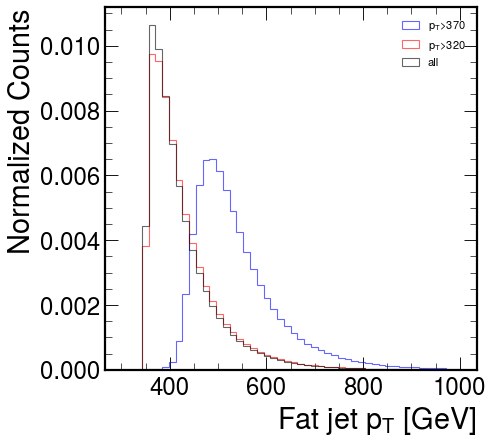

In [82]:
# Let's select some data (note that trigger can only be > 0)

# First let's build masks on our data - these will be boolean arrays
alldata      = (dataDict['data'].arrays('trigger', library="np")["trigger"].flatten() >= -1000000)
triggerdata1 = (dataDict['data'].arrays('trigger', library="np")["trigger"].flatten() % 2 > 0) #let's require the lowest trigger jet pT > 320
triggerdata2 = (dataDict['data'].arrays('trigger', library="np")["trigger"].flatten() % 4 > 1) #let's require one of our standard triggers (jet pT > 370 )

# Now let's make a plot of the fat jet pt  
# normalized
histErr('vjet0_pt','Fat jet $p_T$ [GeV]',50,300,1e3,
        [dataDict['data'],dataDict['data'],dataDict['data']],
        [alldata,triggerdata1,triggerdata2],
        iLabels=['all','$p_T$>320','$p_T$>370'],
        iColors=['black','red','blue'],
        iDensity=True,iStack=False,iWeights=None)

#So you can see as you cut tighter, you get much less jets, but the data will be cleaner (I suggest triggerdata1)

When defining our selection, to apply the trigger we use this line of code:

trigger = (iData.arrays('trigger', library="np)["trigger"].flatten() >= 0)

## 7.3.2 Jet Grooming

After you have applied a trigger the next couple of steps are jet grooming.  Jet Grooming is where we try to remove things like soft radiation and jet pile up.  In this project, we use a specific grooming technique called jet trimming. This is all based on jet pt.

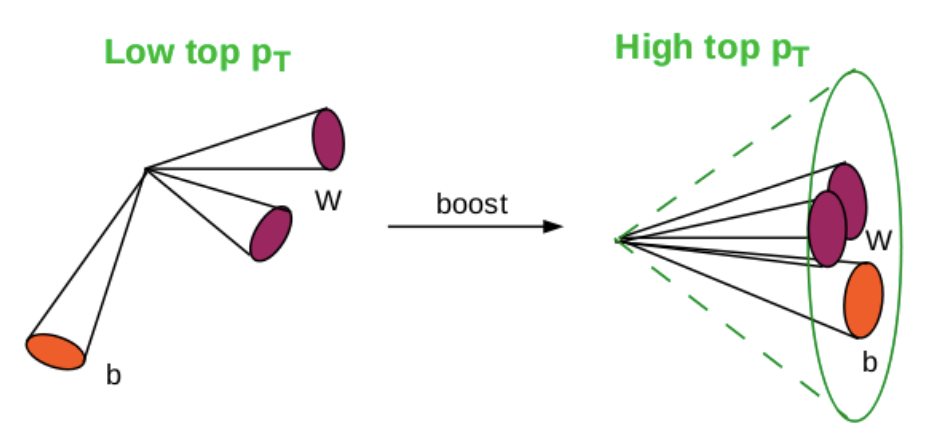

In jet trimming, you can set a limit on the jet pt and remove subjets that don't reach this level.


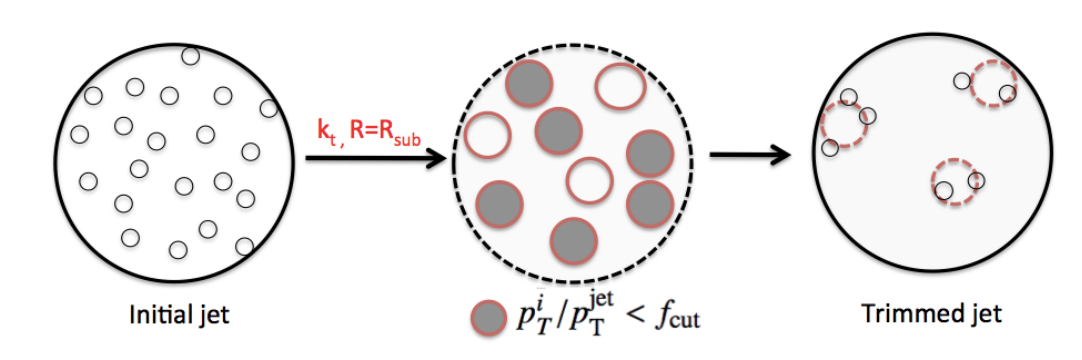

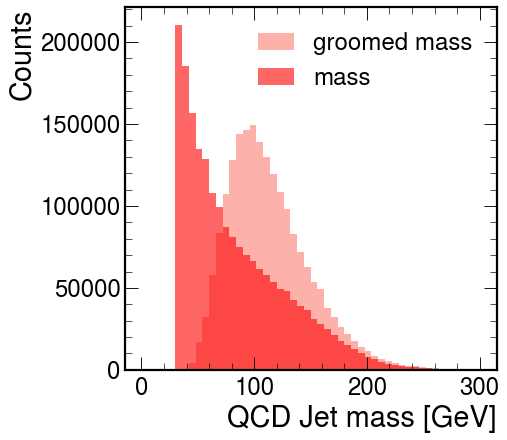

In [80]:
# First let's define a quick selection (a simple pT cut of 400 GeV and a 320 GeV trigger)
def selection(iData):
    #lets apply a trigger selection
    trigger = (iData.arrays('trigger', library="np")["trigger"].flatten() > 0)
    #Now lets require the jet pt to be above a threshold
    jetpt   = (iData.arrays('vjet0_pt', library="np")["vjet0_pt"].flatten() > 400)
    standard_trig = (iData.arrays('trigger', library="np")["trigger"].flatten() % 2 > 1) #lets require one of our standard triggers (jet pT > 320 )
    # standard_trig = (iData.arrays('trigger', library="np")["trigger"].flatten() % 4 > 1) #lets require one of our standard triggers (jet pT > 370 )
    allcuts = np.logical_and.reduce([trigger,jetpt])
    return allcuts

# Let's look at all the data files (except the 8 TeV W and Z samples - let's work with the 13 TeV ones)
myDataDict = OrdDataDict.copy()
del myDataDict['wqq_n']
del myDataDict['zqq_n']
del myDataDict['data']

# Get masks for the selection defined above (both for simulated datasets and data)
masks = {}
for key in myDataDict: masks[key] = selection(myDataDict[key])
maskData = selection(dataDict['data'])

# Now let's plot the mass and the groomed mass (msd0) for the QCD background
fig, ax = plt.subplots(1,1,figsize=(6,6),dpi=80)
plt.hist(qcd.arrays('vjet0_mass', library="np")["vjet0_mass"][masks['qcd']],weights=get_weights(weights,masks['qcd'],'qcd'),
         bins=50,range=(0,300), color='salmon',label="groomed mass", alpha=.6)
plt.hist(qcd.arrays('vjet0_msd0', library="np")["vjet0_msd0"][masks['qcd']], weights=get_weights(weights,masks['qcd'],'qcd'),
         bins=50,range=(0,300), color='red',label="mass", alpha=.6)
plt.legend()
plt.xlabel("QCD Jet mass [GeV]")
plt.ylabel("Counts")
plt.show()

When defining our selection, we can use this line of code to perform jet trimming:

jetpt   = (iData.arrays('vjet0_pt', library="np")["vjet0_pt"].flatten() >= 400)

Where we perform a Pt cut at 400 GeV.  If you are curious, you can mess around with exactly where you make the cut to see how it effects your plot.


## 7.3.3 N-Subjettiness

Now that we have done the basic reduction steps, it's time to remove other subjets that belong to events we aren't interested in at the moment.

<!--start-block-->
#### <span style="color:purple">>>>QUESTION</span>

What background jets should we be looking to remove?  

Hint:  If you haven't already, skim the reading at the start of project 2.


<br>
<!--end-block-->

- QCD Background: productions of light quarks and gluons
- Top Quark Background: production of top quark pairs 
- Diboson Background: production of a pair of W or Z bosons
- Production of Z and Higgs bosons that decay into a pair of bottom quarks

To help us remove even more background we use a concept known as n-subjettiness. As jets have become even more boosted, standard reconstruction methods have become ineffective at identifing electroweak bosons.  There is simply too much QCD background.  

N-subjettiness is a way to define the internal structure of jets by basically counting the number of subjets in a given jet.  This can help differentiate between different types of boosted objects. The terminology around this is looking for n-prong substructures.

(If you want more information on the mathematical definition, I recomend reading through Appendix A of https://arxiv.org/pdf/1011.2268.pdf)

For looking at electroweak bosons we use $T_{2}/T_{1}$.  Another common one (and an interesting other project) would be looking tor boosted top quarks and other three-prong objects by using $T_{3}/T_{2}$.

For more information, here are the two papers I found super insightful: 
- https://arxiv.org/pdf/1004.2489.pdf
- https://arxiv.org/pdf/1011.2268.pdf

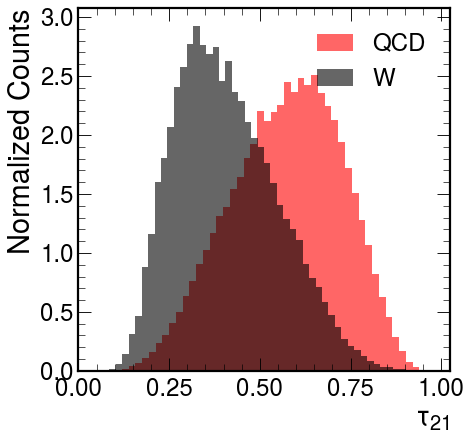

In [83]:
# Compute the t21 ratio
# let's use the same selection set above
# note that here we are going to use our 13 TeV signal samples
fig, ax = plt.subplots(1,1,figsize=(6,6),dpi=80)
qcdt21 = (qcd.arrays('vjet0_t2', library="np")["vjet0_t2"][masks['qcd']]/
          qcd.arrays('vjet0_t1', library="np")["vjet0_t1"][masks['qcd']])
wt21 = (wqq13.arrays('vjet0_t2', library="np")["vjet0_t2"][masks['wqq13']]/
          wqq13.arrays('vjet0_t1', library="np")["vjet0_t1"][masks['wqq13']])

plt.hist(qcdt21, weights=get_weights(weights,masks['qcd'],'qcd'),
         bins=50, color='red',label="QCD", alpha=.6, density=True)
plt.hist(wt21, weights=get_weights(weights,masks['wqq13'],'wqq13')*wscale,
         bins=50, color='black',label="W", alpha=.6, density=True)
plt.legend()
plt.xlabel(r"$\tau_{21}$")
plt.ylabel("Normalized Counts")
plt.show()

<!--start-block-->
#### <span style="color:purple">>>>QUESTION</span>

When defining our selection, how would we define t21?

In [ ]:
t21 = (iData.arrays('vjet0_t2', library="np")["vjet0_t2"]/iData.arrays('vjet0_t1', library="np")["vjet0_t1"])

## 7.3.4 Designing Decorolated Taggers (DDT)

Based off of n-subjettiness, we would simply use $T_{2}/T_{1}$ to make our cuts.  However, this only takes into account n-prong substructure.  Making cuts simply based on $T_{2}/T_{1}$ when looking for W bosons does reduce background, but leads to "unwanted sculpting of the soft drop jet mass distribution".  Without getting into the nitty-gritty, this is unwanted.

The goal is to transition to a variable $T_{21}'$ to make cuts based on.

To explain this transition, I will first introduce a variable $rho$ that is used to describe the soft drop.  This uses jet mass and Pt (it normally also includes R, but for simplicity the paper I learned this equation from used R=0.8 as an approximation).  Here is the equation:

$rho=log(m^2/(p_{t})^2)$

To try to remove the dependence on this soft drop we create a modified version of $rho$ defined as:

$rho'=rho+log(p_{t}/mu)=log(m^2/(p_{t}*mu)$

By defining this new variable, most of the Pt dependence was accounted for.  Now we transition towards making the new variable $T_{21}'$ which is linearly dependent on $rho'$.  It is defined as follows:

$T_{21}'=T_{2}/T_{1} - M*rho'$

where M is fitted by modeling the soft mass drop (i.e $T_{2}/T_{1}$ graphed based on $rho'$)

For more information on DDT: https://arxiv.org/pdf/1603.00027.pdf

P.S: Professor Harris coauthored this paper, so talk to him if you are super curious about it!

<!--start-block-->
#### <span style="color:purple">>>>QUESTION</span>

How would you code rho prime (approximating mu = 1)?

Hint: Use 'vjet0_msd0' for mass and 'vjet0_pt' for pt


In [ ]:
 rho = np.log(iData.arrays('vjet0_msd0',library="np")["vjet0_msd0"]**2/iData.arrays('vjet0_pt',library="np")["vjet0_pt"])

<!--start-block-->
#### <span style="color:purple">>>>QUESTION</span>

Appoximating M=0.065, define T21ddt.

In [ ]:
t21ddt = t21 + .065*rho 

From here, you simply need to determine the point you are defining as your cut (aka T21ddt < ???) and you have finished part one of the homework!